In [73]:
#Assignment 5 (15 pts)
#In this assignment, you will analyze the usps dataset (available on ISIS) with PCA in the following manner:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
%matplotlib inline

import sheet1 as imp
from scipy.io import loadmat

#1. Load the usps data set.
data = loadmat('usps.mat') 
label = data['data_labels']
pat = data['data_patterns']

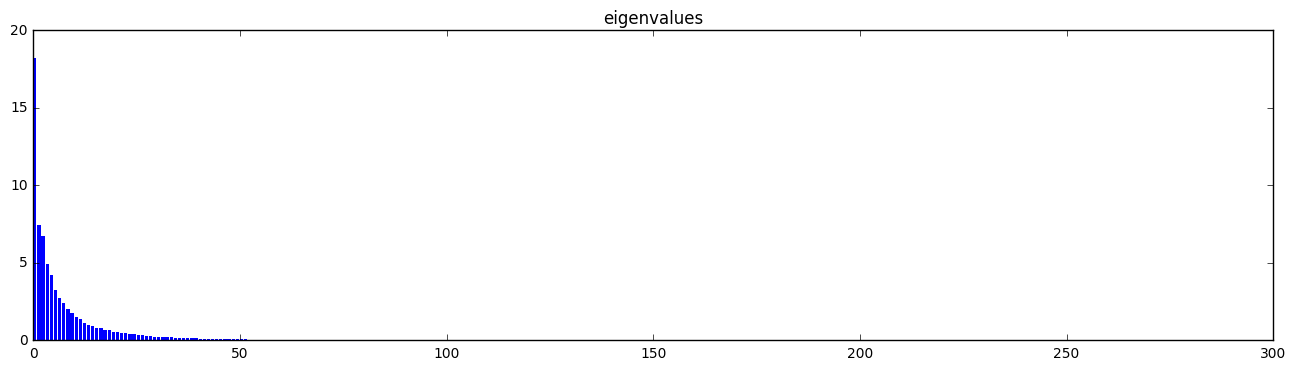

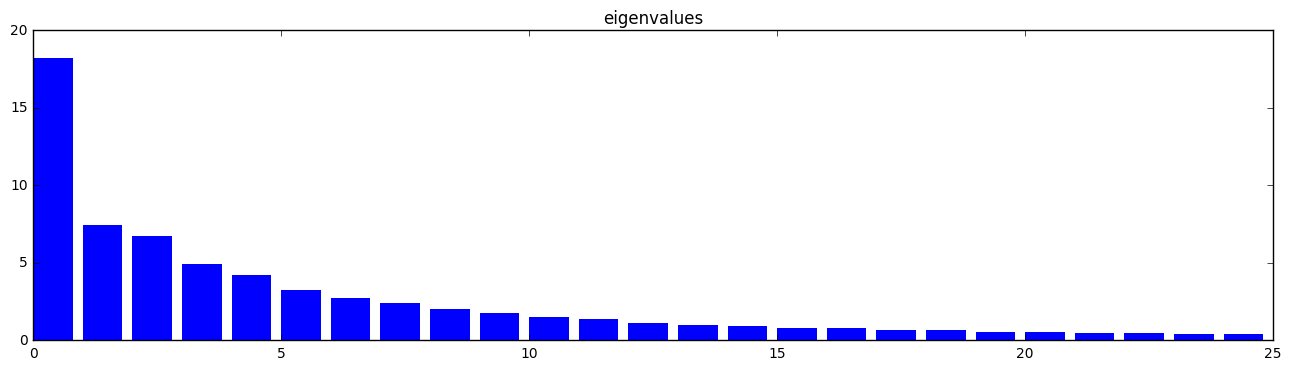

In [74]:
#2. Analysis of PCA:
pca = imp.PCA(pat.T)

#(a) Visualize all principal values,
plt.figure(0, (16,4))
cut = len(pca.D)
plt.bar(np.arange(cut), pca.D[:cut], lw=0)
plt.title("eigenvalues")
plt.show()

#(b) Visualize the largest 25 principal values 
plt.figure(0, (16,4))
cut = min(len(pca.D),25)
plt.bar(np.arange(cut), pca.D[:cut], lw=0)
plt.title("eigenvalues")
plt.show()

In [79]:
pat.shape

(256, 2007)

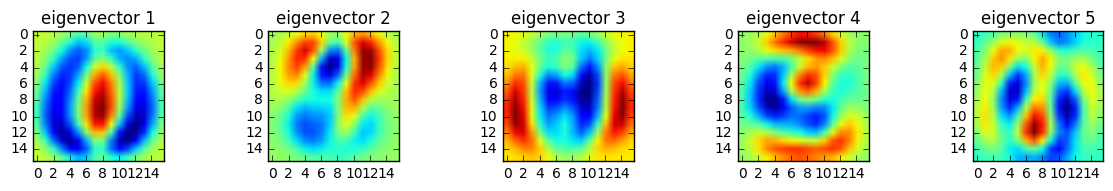

In [76]:
#(c) the first 5 principal directions (as images, see imshow).
plt.figure(figsize=(48,32))
for i in range(5):
    plt.subplot(16,16,i+1)
    plt.title("eigenvector %i" % (i+1))
    plt.imshow(pca.U.T[:,i].reshape(16,16))

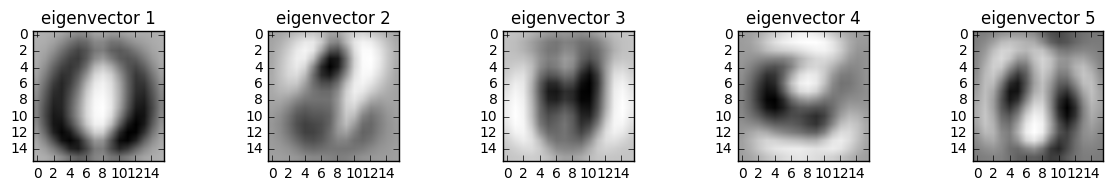

In [77]:
import matplotlib.cm as cm
plt.figure(figsize=(48,32))
for i in range(5):
    plt.subplot(16,16,i+1)
    plt.title("eigenvector %i" % (i+1))
    plt.imshow(pca.U.T[:,i].reshape(16,16),cmap = cm.Greys_r)

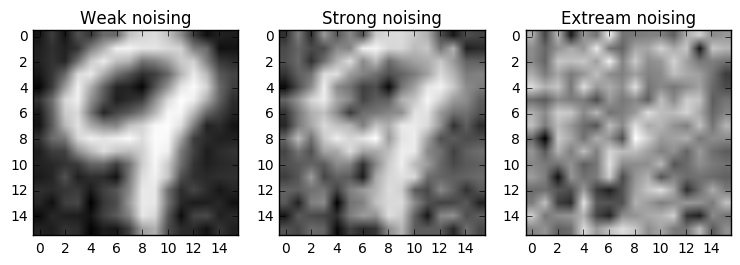

In [80]:
# allgemine noise 
N = len(pat[0])
ns = np.random.randn(256,N)
sigmah = 3
sigmal = 0.3
nsh = ns*sigmah
nsl = ns*sigmal

# Weak noising
lownoised = pat + 0.1*ns


# Strong noising
highnoised = pat + 0.3*ns

# Extreaam noising
extream = np.array(pat)
extream[:,0:5] =extream[:,0:5]- ns[:,0:5]*1.8

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.title("Weak noising")
plt.imshow(lownoised[:,0].reshape(16,16),cmap = cm.Greys_r)
plt.subplot(132)
plt.title("Strong noising")
plt.imshow(highnoised[:,0].reshape(16,16),cmap = cm.Greys_r)
plt.subplot(133)
plt.title("Extream noising")
plt.imshow(extream[:,0].reshape(16,16),cmap = cm.Greys_r)

In [81]:
#3. Consider three noise scenarios 
# a) Calculate the PCA of this data and redo the plots of prinicipal values.
#    Explain the differences to the original spectrum.

# PCA with lownoise
lowpca = imp.PCA(lownoised.T)
highpca = imp.PCA(highnoised.T)
expca = imp.PCA(extream.T)

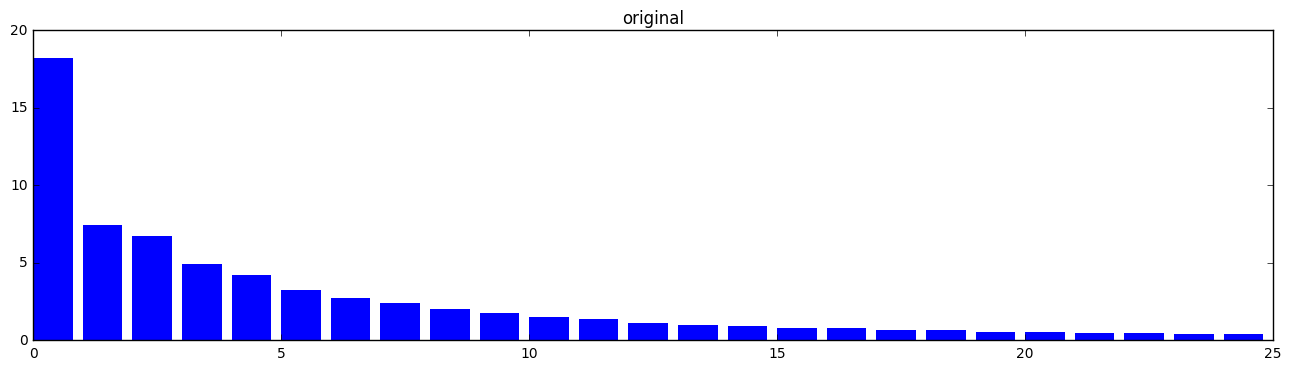

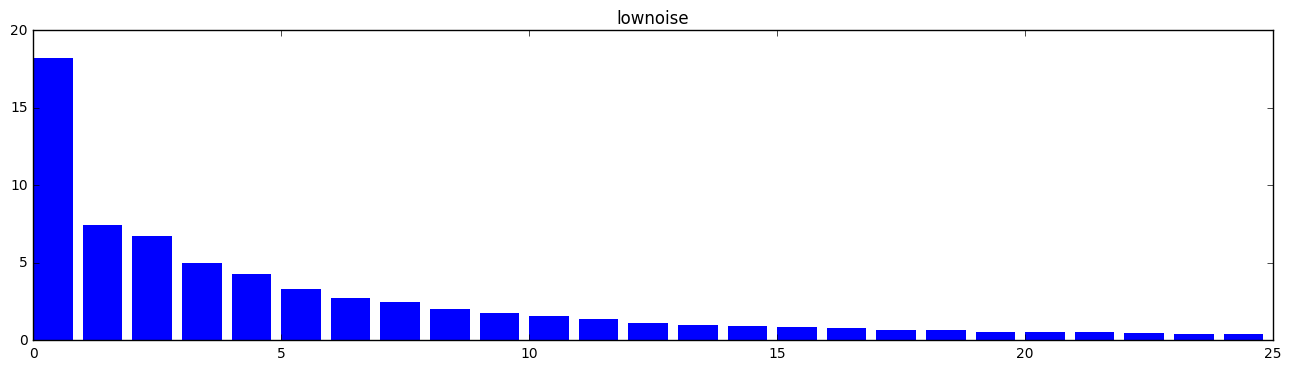

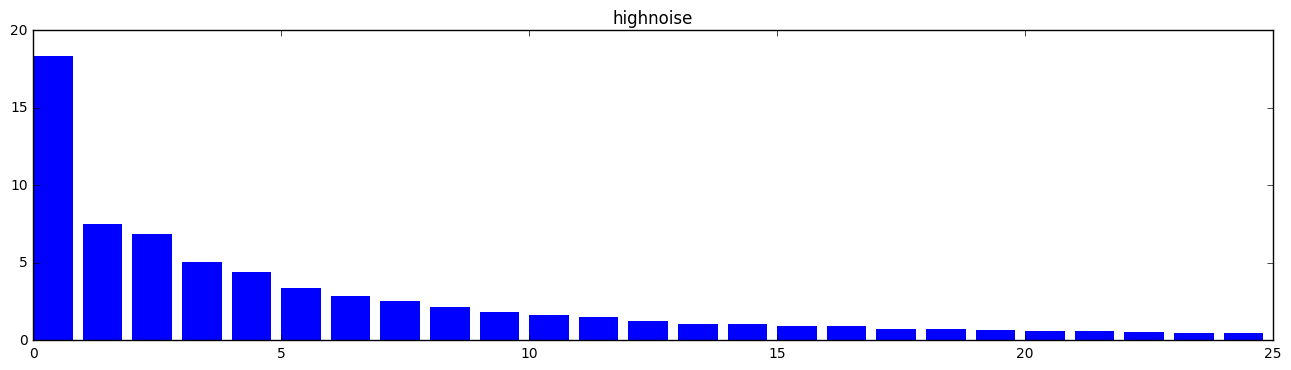

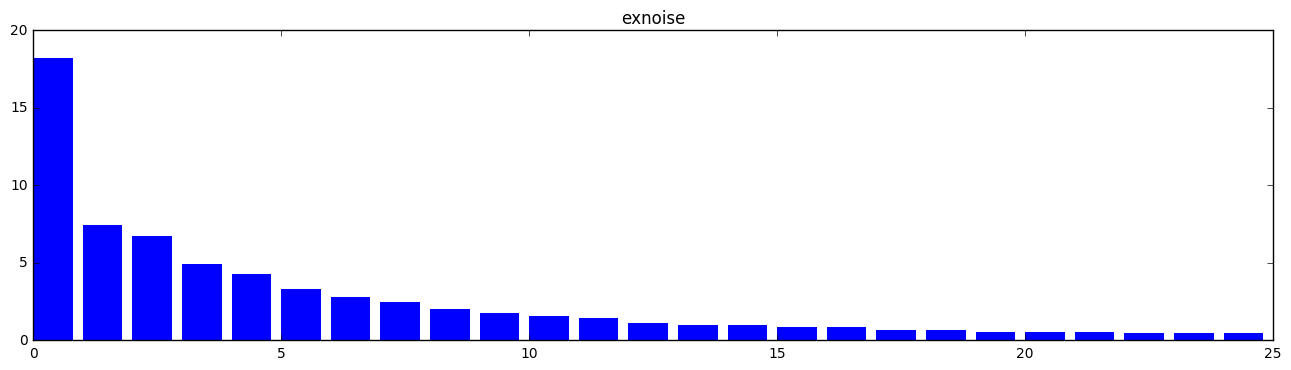

In [82]:
# original eigenvalue

plt.figure(0, (16,4))
cut = min(len(pca.D),25)
plt.bar(np.arange(cut), pca.D[:cut], lw=0)
plt.title("original")
plt.show()

# low noised version

plt.figure(0, (16,4))
cut = min(len(lowpca.D),25)
plt.bar(np.arange(cut), lowpca.D[:cut], lw=0)
plt.title("lownoise")
plt.show()

# high noised version

plt.figure(0, (16,4))
cut = min(len(highpca.D),25)
plt.bar(np.arange(cut), highpca.D[:cut], lw=0)
plt.title("highnoise")
plt.show()

# extream noised version

plt.figure(0, (16,4))
cut = min(len(expca.D),25)
plt.bar(np.arange(cut),expca.D[:cut], lw=0)
plt.title("exnoise")
plt.show()

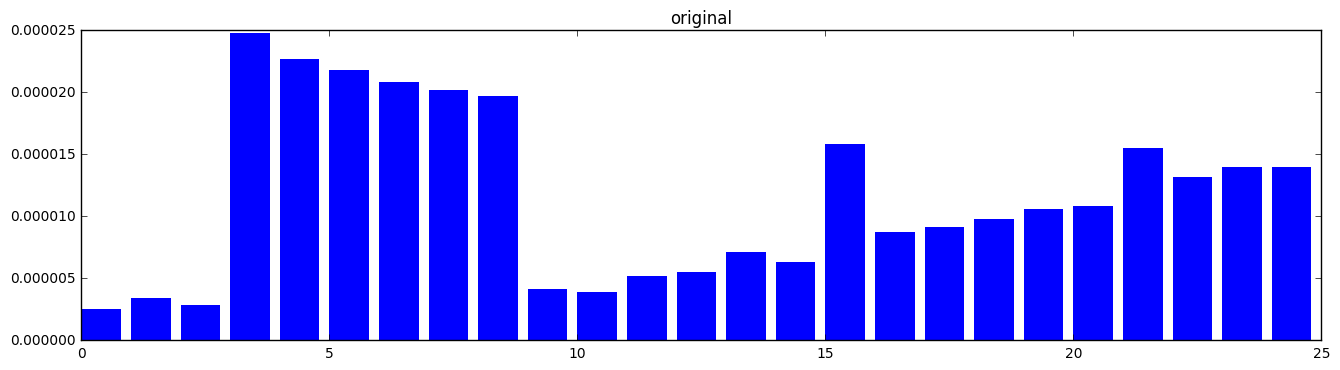

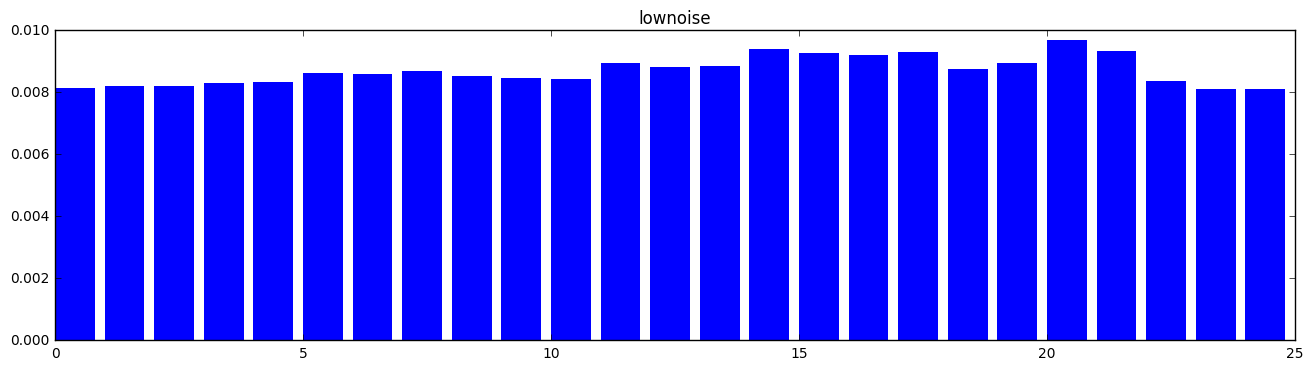

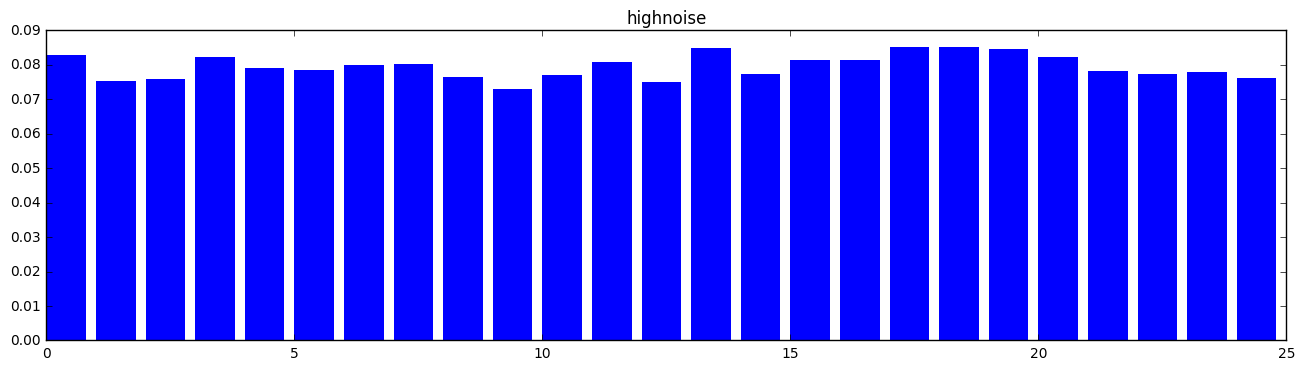

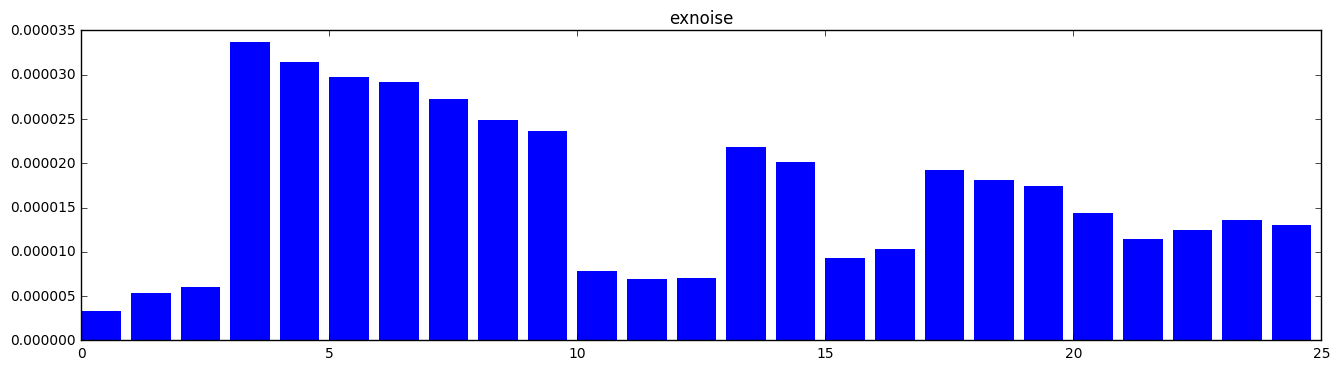

In [83]:
# original eigenvalue7
cut = -25
plt.figure(0, (16,4))
plt.bar(np.arange(abs(cut)), pca.D[cut:], lw=0)
plt.title("original")
plt.show()

# low noised version
plt.figure(0, (16,4))
plt.bar(np.arange(abs(cut)), lowpca.D[cut:], lw=0)
plt.title("lownoise")
plt.show()

# high noised version
plt.figure(0, (16,4))
plt.bar(np.arange(abs(cut)), highpca.D[cut:], lw=0)
plt.title("highnoise")
plt.show()

# extream noised version
plt.figure(0, (16,4))
plt.bar(np.arange(abs(cut)), expca.D[cut:], lw=0)
plt.title("exnoise")
plt.show()


Strong noise
When m=81 minial error with 9.274096


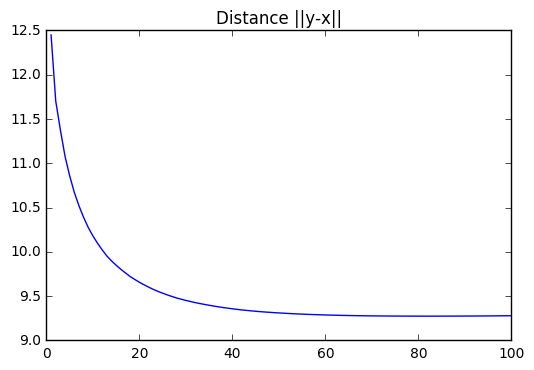

In [84]:
#b)Denoise the images by reconstruction from projections on the m largest principal components:
#  the reconstruction y of a data point x by the m largest eigenvectors v1; : : : ; vm of the covariance
#  matrix is given by
#lowpca = imp.PCA(lownoised.T)
#highpca = imp.PCA(highnoised.T)
#expca = imp.PCA(extream.T)

#lownoise
ite = 100
errmean= np.zeros(ite)
for i in range(ite):
    denol=lowpca.denoise(lownoised.T,i)
    errmean[i] =np.mean(np.linalg.norm(pat - denol.T,axis=0)) 
    
minerrqrg = np.argmin(errmean)
minerr = np.min(errmean)
print("Strong noise")
print("When m=%i" %minerrqrg + " minial error with %f"%minerr)
plt.title("Distance ||y-x||")
plt.plot(np.arange(1,101),errmean)

In [85]:
denol=lowpca.denoise(lownoised.T,minerrqrg)
denol=denol.T

Strong noise
When m=41 minial error with 9.549555


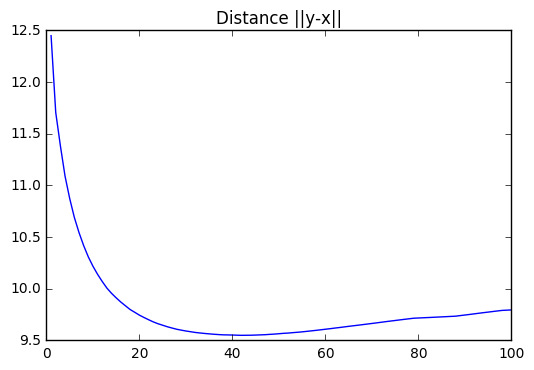

In [86]:
#highnoise
ite = 100
errmeanh= np.zeros(ite)
for i in range(ite):
    denoh=highpca.denoise(highnoised.T,i)
    errmeanh[i] =np.mean(np.linalg.norm(pat - denoh.T,axis=0)) 
    
minerrqrgh = np.argmin(errmeanh)
minerrh = np.min(errmeanh)
print("Strong noise")
print("When m=%i" %minerrqrgh + " minial error with %f"%minerrh)
plt.title("Distance ||y-x||")
plt.plot(np.arange(1,101),errmeanh)

In [87]:
denoh=highpca.denoise(highnoised.T,minerrqrg)
denoh = denoh.T

Extream noise
When m=99 minial error with 9.269161


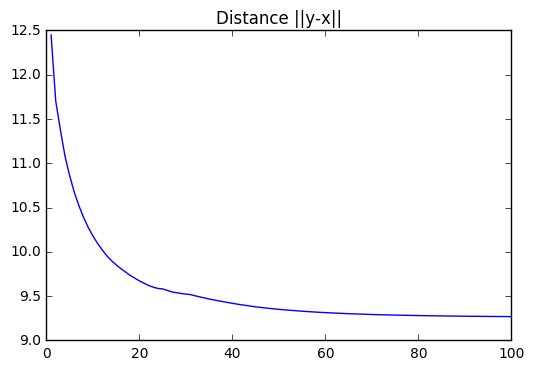

In [88]:
#exnoise
ite = 100
errmeanex= np.zeros(ite)
for i in range(ite):
    denoex=expca.denoise(extream.T,i)
    errmeanex[i] =np.mean(np.linalg.norm(pat - denoex.T,axis=0)) 
    
minerrqrgex = np.argmin(errmeanex)
minerrex = np.min(errmeanex)
print("Extream noise")
print("When m=%i" %minerrqrgex + " minial error with %f"%minerrex)
plt.title("Distance ||y-x||")
plt.plot(np.arange(1,101),errmeanex)

In [89]:
denoex=expca.denoise(extream.T,minerrqrgex)
denoex = denoex.T

Low noise 10 examples comparing to original and denoised


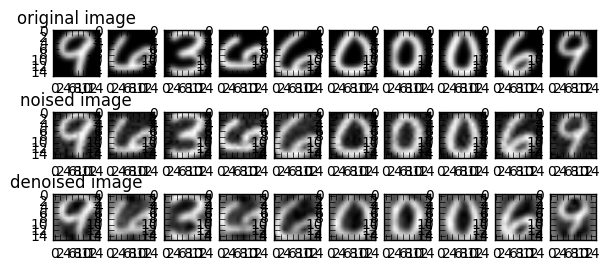

In [90]:
# c)
print("Low noise 10 examples comparing to original and denoised")
plt.figure(figsize=(7,3))
for i in range(10):
    plt.subplot(3,10,i+1)
    if(i==0):
        plt.title("original image" )
    plt.imshow((pat[:,i].reshape(16,16)),cmap='gray')
    plt.subplot(3,10,i+11)
    if(i==0):
        plt.title("noised image" )
    plt.imshow((lownoised[:,i].reshape(16,16)),cmap='gray')
    plt.subplot(3,10,i+21)
    if(i==0):
        plt.title("denoised image" )
    plt.imshow((denol[:,i].reshape(16,16)),cmap='gray')

Strong noise 10 examples comparing to original and denoised


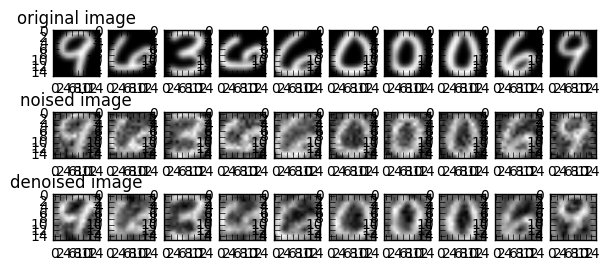

In [91]:
print("Strong noise 10 examples comparing to original and denoised")
plt.figure(figsize=(7,3))
for i in range(10):
    plt.subplot(3,10,i+1)
    if(i==0):
        plt.title("original image" )
    plt.imshow((pat[:,i].reshape(16,16)),cmap='gray')
    plt.subplot(3,10,i+11)
    if(i==0):
        plt.title("noised image" )
    plt.imshow((highnoised[:,i].reshape(16,16)),cmap='gray')
    plt.subplot(3,10,i+21)
    if(i==0):
        plt.title("denoised image" )
    plt.imshow((denoh[:,i].reshape(16,16)),cmap='gray')

Strong noise 10 examples comparing to original and denoised


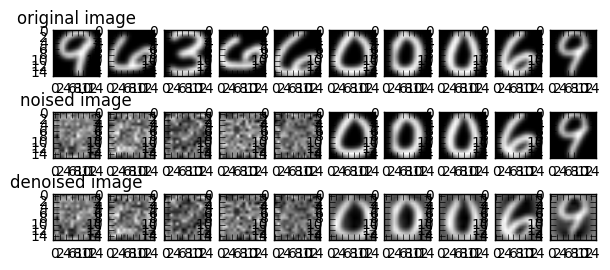

In [92]:
print("Strong noise 10 examples comparing to original and denoised")
plt.figure(figsize=(7,3))
for i in range(10):
    plt.subplot(3,10,i+1)
    if(i==0):
        plt.title("original image" )
    plt.imshow((pat[:,i].reshape(16,16)),cmap='gray')
    plt.subplot(3,10,i+11)
    if(i==0):
        plt.title("noised image" )
    plt.imshow((extream[:,i].reshape(16,16)),cmap='gray')
    plt.subplot(3,10,i+21)
    if(i==0):
        plt.title("denoised image" )
    plt.imshow((denoex[:,i].reshape(16,16)),cmap='gray')

In [3]:
#Assignment 6

import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
%matplotlib inline

import sheet1 as imp
from scipy.io import loadmat

banana = np.load('banana.npz')
data = banana['data']
labels = banana['label']

posarg = np.where(labels[0] == 1)
negarg = np.where(labels[0] == -1)

inlines = np.array(data[:,posarg[0]])
negclass = np.array(data[:,negarg[0]])

ite =100
p = np.array([0.01, 0.05, 0.1, 0.25])
N = len(data[0])
NN = len(negclass[0])
NP = len(posarg[0])
n = NP*p/(1-p)
knu = n +NP
c = np.empty((4,ite))
gammak3_1p = np.empty((ite,int(knu[0])))
gammak10_1p = np.empty((ite,int(knu[0])))
gammak3_5p = np.empty((ite,int(knu[1])))
gammak10_5p = np.empty((ite,int(knu[1])))
gammak3_10p = np.empty((ite,int(knu[2])))
gammak10_10p = np.empty((ite,int(knu[2])))
gammak3_25p = np.empty((ite,int(knu[3])))
gammak10_25p = np.empty((ite,int(knu[3])))

In [4]:
# Case 1%
for i in range(100):
    choice1 = np.random.choice(NN,int(n[0]))
    negchoiced1 = negclass[:,choice1]
    newset1 = np.append(inlines, negchoiced1,axis=1)
    newlabel1 = np.append(np.ones((NP)), -np.ones(int(n[0])),axis=0)
    #(a) 
    gammak3_1p[i] = imp.gammaidx(newset1.T, 3)
    #(b)
    gammak10_1p[i] = imp.gammaidx(newset1.T, 10)
    mpoint1 = np.mean(newset1,axis=1)
    #(c)
    D1 = np.linalg.norm(newset1-mpoint1.reshape(2,1),axis=0)
    D1[np.where(D1==0)] = np.min(D1)
    invD1 = 1/D1
    c[0][i] = imp.auc(newlabel1, invD1, plot=False)

In [5]:
# Case 5%
for i in range(100):
    choice5 = np.random.choice(NN,int(n[1]))
    negchoiced5 = negclass[:,choice5]
    newset5 = np.append(inlines, negchoiced5,axis=1)
    newlabel5 = np.append(np.ones((NP)), -np.ones(int(n[1])),axis=0)
    #(a) 
    gammak3_5p[i] = imp.gammaidx(newset5.T, 3)
    #(b)
    gammak10_5p[i] = imp.gammaidx(newset5.T, 10)
    mpoint5 = np.mean(newset5,axis=1)
    #(c)
    D5 = np.linalg.norm(newset5-mpoint5.reshape(2,1),axis=0)
    D5[np.where(D5==0)] = np.min(D5)
    invD5 = 1/D5
    c[1][i] = imp.auc(newlabel5, invD5, plot=False)

In [6]:
# Case 10%
for i in range(100):
    choice10 = np.random.choice(NN,int(n[2]))
    negchoiced10 = negclass[:,choice10]
    newset10 = np.append(inlines, negchoiced10,axis=1)
    newlabel10 = np.append(np.ones((NP)), -np.ones(int(n[2])),axis=0)
    #(a) 
    gammak3_10p[i] = imp.gammaidx(newset10.T, 3)
    #(b)
    gammak10_10p[i] = imp.gammaidx(newset10.T, 10)
    mpoint10 = np.mean(newset10,axis=1)
    #(c)
    D10 = np.linalg.norm(newset10-mpoint10.reshape(2,1),axis=0)
    D10[np.where(D10==0)] = np.min(D10)
    invD10 = 1/D10
    c[2][i] = imp.auc(newlabel10, invD10, plot=False)

In [7]:
# Case 25%
for i in range(100):
    choice25 = np.random.choice(NN,int(n[3]))
    negchoiced25 = negclass[:,choice25]
    newset25 = np.append(inlines, negchoiced25,axis=1)
    newlabel25 = np.append(np.ones((NP)), -np.ones(int(n[3])),axis=0)
    #(a) 
    gammak3_25p[i] = imp.gammaidx(newset25.T, 3)
    #(b)
    gammak10_25p[i] = imp.gammaidx(newset25.T, 10)
    mpoint25 = np.mean(newset25,axis=1)
    #(c)
    D25 = np.linalg.norm(newset25-mpoint25.reshape(2,1),axis=0)
    D25[np.where(D25==0)] = np.min(D25)
    invD25 = 1/D25
    c[3][i] = imp.auc(newlabel25, invD25, plot=False)

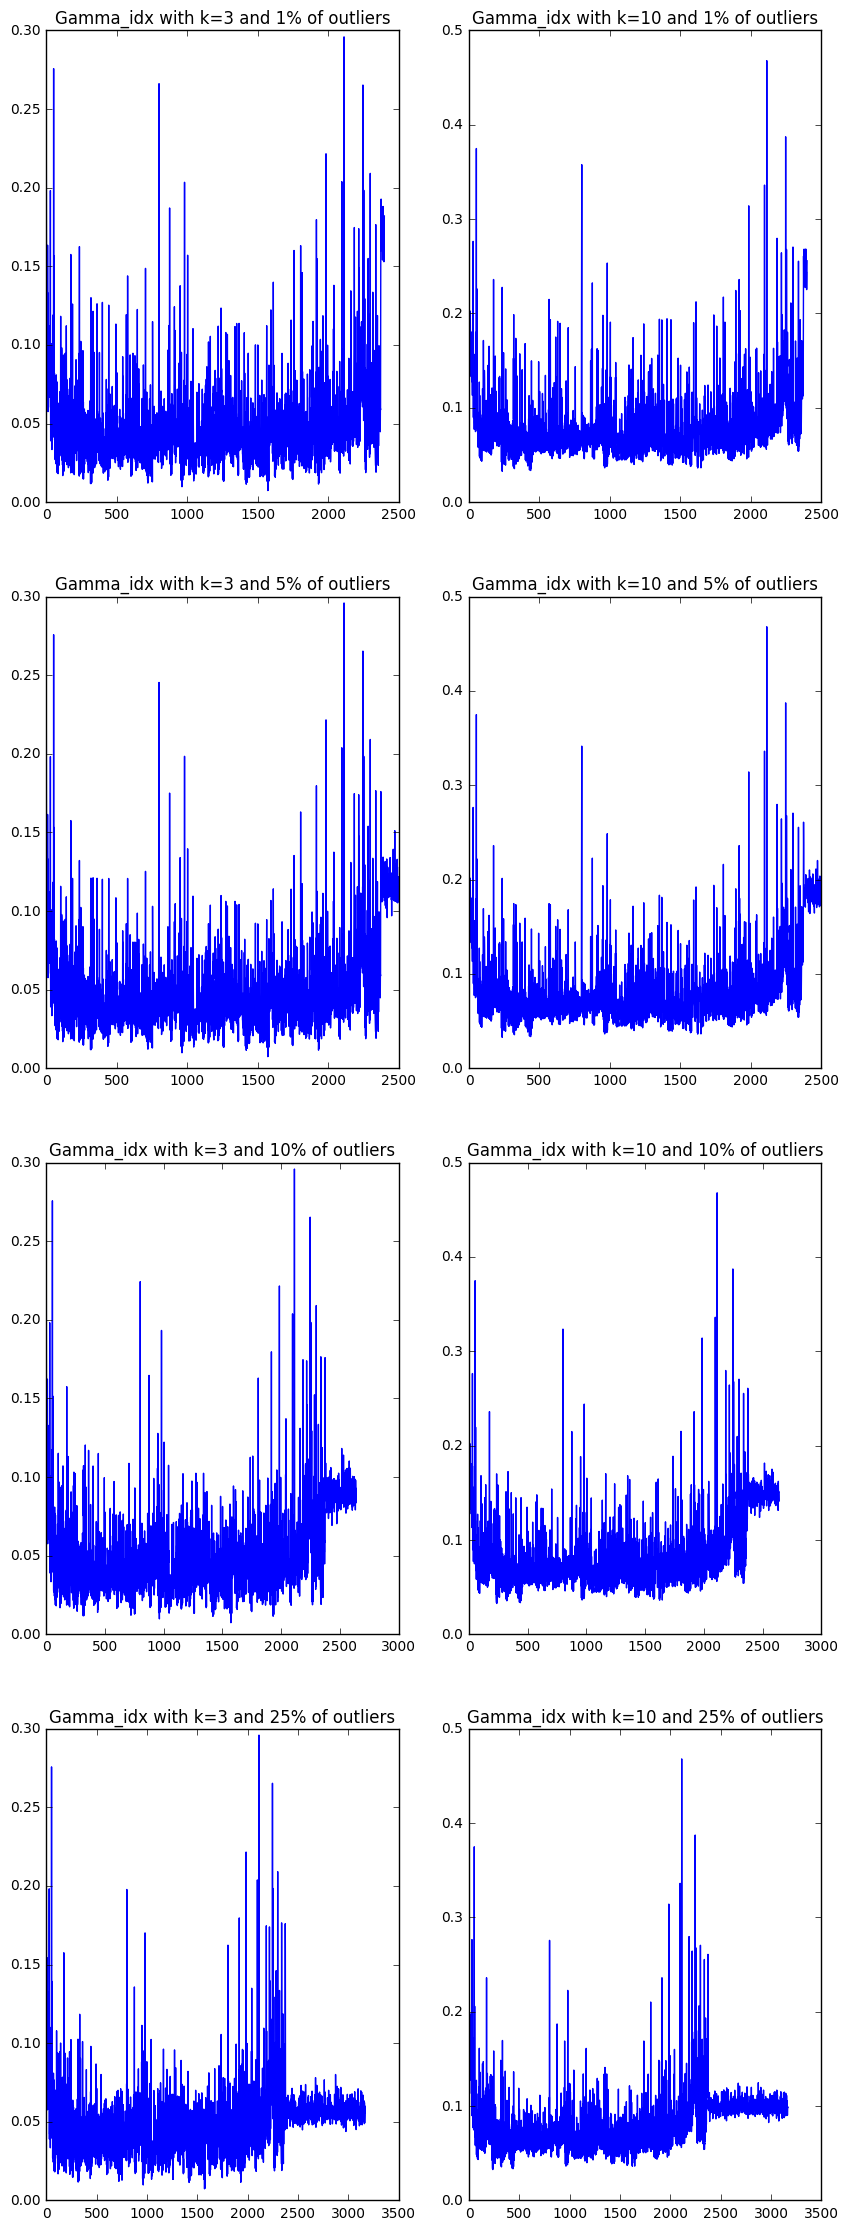

In [8]:
plt.figure(figsize=(10,28))
plt.subplot(421)
plt.title("Gamma_idx with k=3 and 1% of outliers")
plt.plot(np.mean(gammak3_1p,axis=0))
plt.subplot(422)
plt.title("Gamma_idx with k=10 and 1% of outliers")
plt.plot(np.mean(gammak10_1p,axis=0))
plt.subplot(423)
plt.title("Gamma_idx with k=3 and 5% of outliers")
plt.plot(np.mean(gammak3_5p,axis=0))
plt.subplot(424)
plt.title("Gamma_idx with k=10 and 5% of outliers")
plt.plot(np.mean(gammak10_5p,axis=0))
plt.subplot(425)
plt.title("Gamma_idx with k=3 and 10% of outliers")
plt.plot(np.mean(gammak3_10p,axis=0))
plt.subplot(426)
plt.title("Gamma_idx with k=10 and 10% of outliers")
plt.plot(np.mean(gammak10_10p,axis=0))
plt.subplot(427)
plt.title("Gamma_idx with k=3 and 25% of outliers")
plt.plot(np.mean(gammak3_25p,axis=0))
plt.subplot(428)
plt.title("Gamma_idx with k=10 and 25% of outliers")
plt.plot(np.mean(gammak10_25p,axis=0))

([<matplotlib.axis.XTick at 0x7f43043ed048>,
 <a list of 4 Text xticklabel objects>)

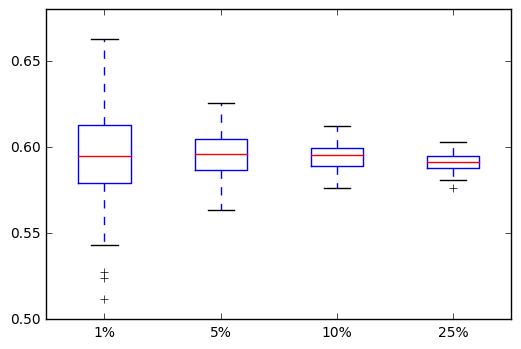

In [15]:
#Boxplot(C)
plt.boxplot(c.T)
plt.xticks([1, 2, 3,4],['1%','5%','10%','25%'])

In [10]:
c.shape

(4, 100)

In [1]:
#Assignment 7

import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import sheet1 as imp
from scipy.io import loadmat
#lle(X, m, tol, n_rule='knn', k=5, epsilon=1.)

fisch = np.load('fishbowl_dense.npz')
swissrole = np.load('swissroll_data.npz')
flatrole = np.load('flatroll_data.npz')

fish = fisch['X']
sr = swissrole['x_noisefree']
Z = swissrole['z']
fr = flatrole['Xflat']
te = flatrole['true_embedding']
print(fish.shape)
print(sr.shape)
print(fr.shape)
print(te.shape)

(3, 2000)
(3, 400)
(2, 1000)
(1, 1000)


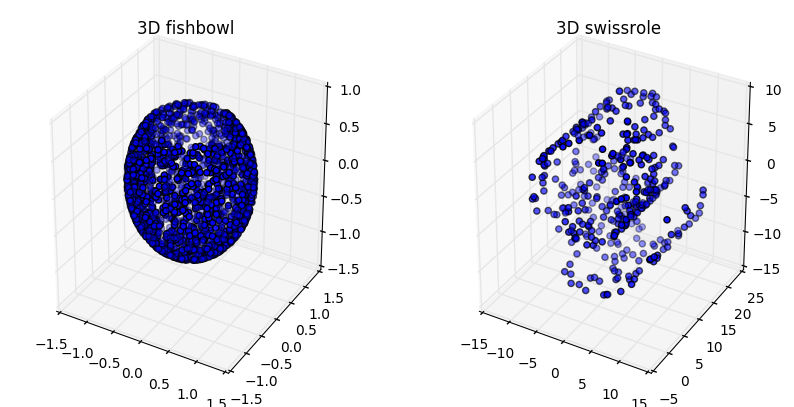

In [2]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
plt.title("3D fishbowl")
ax.scatter(fish[0], fish[1], fish[2])
ax = fig.add_subplot(122,projection='3d')
plt.title("3D swissrole")
ax.scatter(sr[0], sr[1], sr[2])

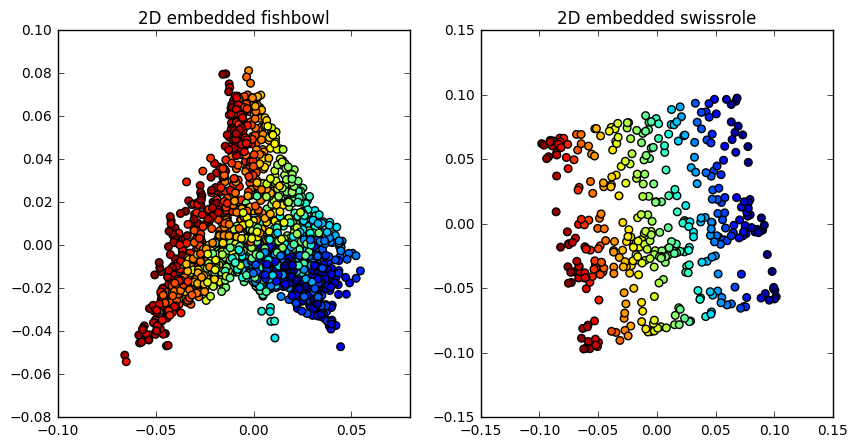

In [3]:
fig = plt.figure(figsize=(10,5))
fishlle = imp.lle(fish.T, m=2, tol=1e-10, n_rule='eps-ball', k=15, epsilon=0.14441549)
srlle = imp.lle(sr.T, m=2, tol=1e-4, n_rule='knn', k=8, epsilon=0.1)
ax2d = fig.add_subplot(121)
plt.title("2D embedded fishbowl")
ax2d.scatter(fishlle[:,0], fishlle[:,1],30,fish.T[:,2])
ax2d = fig.add_subplot(122)
plt.title("2D embedded swissrole")
ax2d.scatter(srlle[:,0], srlle[:,1],30,Z.T[:, 1])

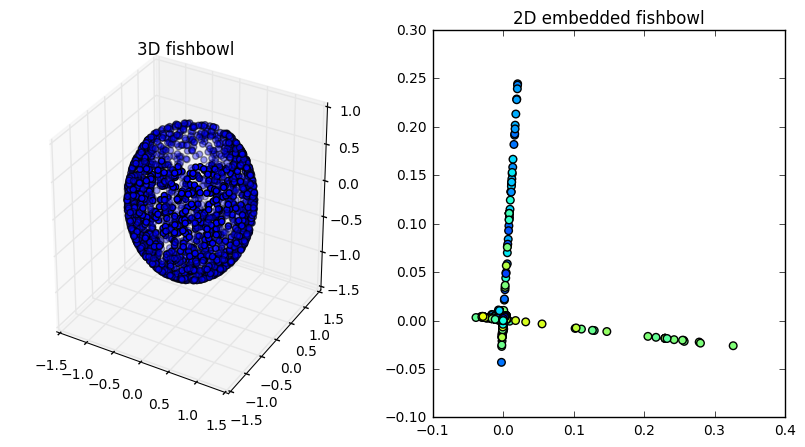

In [10]:
# 3D and 2D embedded plot of fishbowl
fig = plt.figure(figsize=(10,5))
fishlle = imp.lle(fish.T, m=2, tol=1e-10, n_rule='knn', k=3, epsilon=0.14441549)
ax = fig.add_subplot(121, projection='3d')
plt.title("3D fishbowl")
ax.scatter(fish[0], fish[1], fish[2])
ax2d = fig.add_subplot(122)
plt.title("2D embedded fishbowl")
ax2d.scatter(fishlle[:,0], fishlle[:,1],30,fish.T[:,2])

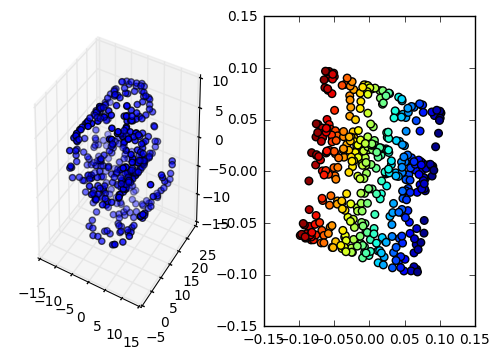

In [5]:
#3D and 2D embedded plot of swissrole
fig = plt.figure()
srlle = imp.lle(sr.T, m=2, tol=1e-4, n_rule='knn', k=8, epsilon=0.1)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(sr[0], sr[1], sr[2])
ax2d = fig.add_subplot(122)
ax2d.scatter(srlle[:,0], srlle[:,1],30,Z.T[:, 1])

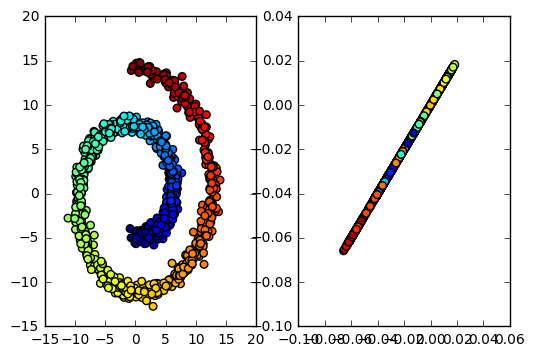

In [57]:
# 2D and 1D embedded plot of flatrole
fig = plt.figure()
frlle = imp.lle(fr.T, m=1, tol=1e-06, n_rule='knn', k=15, epsilon=0.1)
length = np.arange(len(frlle))
ax = fig.add_subplot(121)
ax.scatter(fr[0], fr[1], 30,te)
ax1d = fig.add_subplot(122)
ax1d.scatter(frlle[:,0],frlle[:,0],30,te)

In [97]:
#Assignment 8

import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
%matplotlib inline

import sheet1 as imp
from scipy.io import loadmat
flatrole = np.load('flatroll_data.npz')
fr = flatrole['Xflat']
te = flatrole['true_embedding']
fr.shape

(2, 1000)

In [101]:
ns = np.random.randn(2,1000)
n18 = 1.8*ns
n02 = 0.2*ns
n18d = fr + n18
n02d = fr +n02

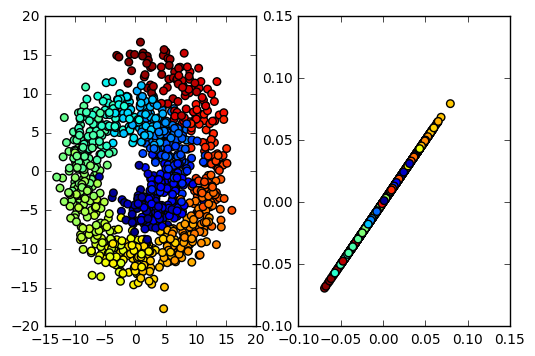

In [102]:
fig = plt.figure()
frlle18 = imp.lle(n18d.T, m=1, tol=1e-06, n_rule='knn', k=15, epsilon=0.1)
length = np.arange(len(frlle18))
ax = fig.add_subplot(121)
ax.scatter(n18d[0], n18d[1], 30,te)
ax1d = fig.add_subplot(122)
ax1d.scatter(frlle18[:,0],frlle18[:,0],30,te)

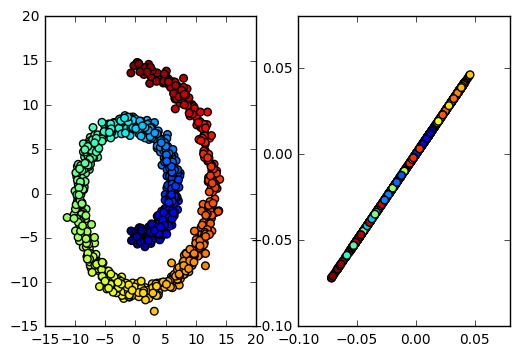

In [103]:
fig = plt.figure()
frlle02 = imp.lle(n02d.T, m=1, tol=1e-06, n_rule='knn', k=15, epsilon=0.1)
length = np.arange(len(frlle02))
ax = fig.add_subplot(121)
ax.scatter(n02d[0], n02d[1], 30,te)
ax1d = fig.add_subplot(122)
ax1d.scatter(frlle02[:,0],frlle02[:,0],30,te)